In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating the dataset directly for this chapter's demonstration
data = {
    'ticker': ['VNM']*8 + ['VCB']*8 + ['HPG']*8,
    'fiscal_year': [2023, 2023, 2023, 2023, 2024, 2024, 2024, 2024] * 3,
    'fiscal_qtr': [1, 2, 3, 4, 1, 2, 3, 4] * 3,
    'eps_basic': [
        1200, 1350, 1400, 1100, 1300, 1500, 1450, 1250, # VNM
        1800, 1900, 2000, 2200, 2100, 2300, 2400, 2600, # VCB
        500, 600, 550, 400, 700, 800, 750, 600          # HPG
    ],
    'price_close': [
        68000, 71000, 74000, 69000, 72000, 75000, 73000, 70000, # VNM
        85000, 88000, 90000, 95000, 92000, 96000, 98000, 102000, # VCB
        20000, 22000, 21000, 19000, 25000, 28000, 27000, 24000 # HPG
    ],
    'special_items': [
        0, 50000, 0, -20000, 0, 0, 10000, 0, # VNM (VND Millions)
        10000, 0, 0, 50000, 0, 20000, 0, 0, # VCB
        0, 0, -50000, 0, 100000, 0, 0, 0 # HPG
    ],
    'shares_out': [2090]*8 + [5580]*8 + [5810]*8, # In Millions
    'analyst_med': [
        1150, 1300, 1450, 1150, 1250, 1400, 1480, 1200, # VNM
        1700, 1850, 1950, 2150, 2000, 2250, 2450, 2550, # VCB
        450, 550, 600, 450, 650, 750, 800, 650 # HPG
    ]
}

df = pd.DataFrame(data)

# Sort strictly to ensure shift operations work on correct temporal sequence
df = df.sort_values(by=['ticker', 'fiscal_year', 'fiscal_qtr'])
print(df.head())

   ticker  fiscal_year  fiscal_qtr  eps_basic  price_close  special_items  \
16    HPG         2023           1        500        20000              0   
17    HPG         2023           2        600        22000              0   
18    HPG         2023           3        550        21000         -50000   
19    HPG         2023           4        400        19000              0   
20    HPG         2024           1        700        25000         100000   

    shares_out  analyst_med  
16        5810          450  
17        5810          550  
18        5810          600  
19        5810          450  
20        5810          650  


In [3]:
# Group by ticker to ensure we don't shift data between companies
df['eps_lag4'] = df.groupby('ticker')['eps_basic'].shift(4)

In [4]:
# Constants
CIT_RATE_VN = 0.20

# Calculate impact per share
# Note: special_items are in millions, shares_out are in millions
# The units cancel out, leaving the result in VND per share.
df['spi_impact_per_share'] = (df['special_items'] * (1 - CIT_RATE_VN)) / df['shares_out']

# Calculate Adjusted EPS
df['eps_adjusted'] = df['eps_basic'] - df['spi_impact_per_share']

# Create lag for Adjusted EPS
df['eps_adj_lag4'] = df.groupby('ticker')['eps_adjusted'].shift(4)

In [5]:
# Method 1: Seasonal Random Walk (Standard EPS)
df['sue_1'] = (df['eps_basic'] - df['eps_lag4']) / df['price_close']

# Method 2: Seasonal Random Walk (Excluding Special Items)
df['sue_2'] = (df['eps_adjusted'] - df['eps_adj_lag4']) / df['price_close']

# Method 3: Analyst Forecasts (IBES Equivalent)
df['sue_3'] = (df['eps_basic'] - df['analyst_med']) / df['price_close']

# Scaling for readability (converting to percentage)
df['sue_1_pct'] = df['sue_1'] * 100
df['sue_2_pct'] = df['sue_2'] * 100
df['sue_3_pct'] = df['sue_3'] * 100

In [6]:
# Filter for 2024 results where lag data exists
results_2024 = df[df['fiscal_year'] == 2024][['ticker', 'fiscal_qtr', 'sue_1_pct', 'sue_2_pct', 'sue_3_pct']]

# Display formatted table
from IPython.display import display, Markdown
markdown_table = results_2024.to_markdown(index=False, floatfmt=".4f")
display(Markdown(markdown_table))

| ticker   |   fiscal_qtr |   sue_1_pct |   sue_2_pct |   sue_3_pct |
|:---------|-------------:|------------:|------------:|------------:|
| HPG      |            1 |      0.8000 |      0.7449 |      0.2000 |
| HPG      |            2 |      0.7143 |      0.7143 |      0.1786 |
| HPG      |            3 |      0.7407 |      0.7152 |     -0.1852 |
| HPG      |            4 |      0.8333 |      0.8333 |     -0.2083 |
| VCB      |            1 |      0.3261 |      0.3276 |      0.1087 |
| VCB      |            2 |      0.4167 |      0.4137 |      0.0521 |
| VCB      |            3 |      0.4082 |      0.4082 |     -0.0510 |
| VCB      |            4 |      0.3922 |      0.3992 |      0.0490 |
| VNM      |            1 |      0.1389 |      0.1389 |      0.0694 |
| VNM      |            2 |      0.2000 |      0.2255 |      0.1333 |
| VNM      |            3 |      0.0685 |      0.0632 |     -0.0411 |
| VNM      |            4 |      0.2143 |      0.2033 |      0.0714 |

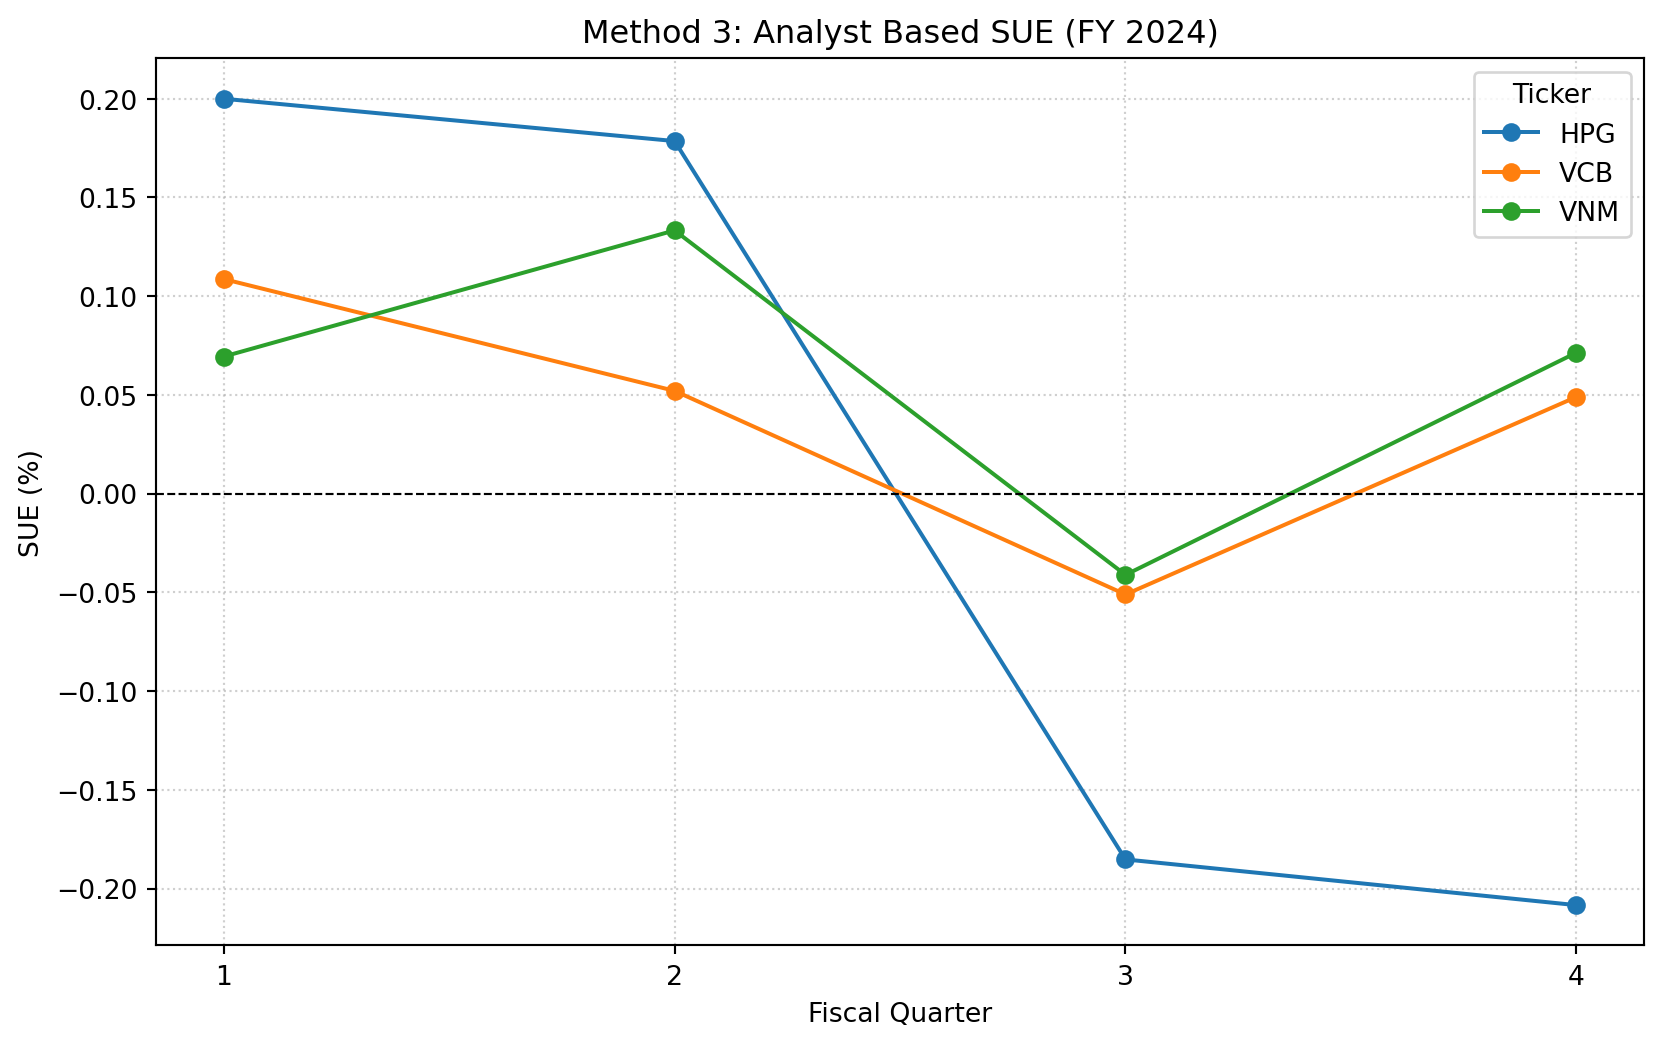

In [7]:
pivot_sue = results_2024.pivot(index='fiscal_qtr', columns='ticker', values='sue_3_pct')

plt.figure(figsize=(10, 6))
for column in pivot_sue.columns:
    plt.plot(pivot_sue.index, pivot_sue[column], marker='o', label=column)

plt.title('Method 3: Analyst Based SUE (FY 2024)')
plt.xlabel('Fiscal Quarter')
plt.ylabel('SUE (%)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend(title='Ticker')
plt.grid(True, linestyle=':', alpha=0.6)
plt.xticks([1, 2, 3, 4])
plt.show()